<h1>Credit Card Fraud Detection</h1>
<h2>Tasks</h2>
<li>Explore the dataset / Visualize</li>
<li>Decide which features are important</li>
<li>Perform machine learning</li>
<li>Test the model on the training set</li>
        


<h2>Import dependancies</h2>

In [1]:
import random
import numpy as np
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

<h2>Create pandas dataset</h2>

In [2]:
df = pd.read_csv('/home/jack/Desktop/creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,170855.0,0.156732,1.063919,-0.487379,-0.595187,1.048420,-0.694332,1.027485,-0.131451,-0.120848,...,-0.346799,-0.827847,0.072384,0.384810,-0.371629,0.123378,0.224312,0.083687,7.70,0
1,51833.0,-0.304248,1.052461,0.827117,-0.325545,0.645941,0.010074,0.604164,0.140427,-0.589492,...,-0.286232,-0.783232,-0.167091,-0.899729,-0.031337,0.127015,0.240090,0.076479,6.15,0
2,39500.0,-2.500902,0.064256,0.721978,1.082510,0.376848,0.245962,-0.807508,-2.544744,-0.389156,...,-1.249027,1.187490,0.861555,-0.034527,-0.395773,-0.405974,-0.635587,-0.035970,26.53,0
3,51911.0,-1.863516,-0.614367,2.490804,0.299000,1.046616,-0.115720,0.223632,-0.057753,0.416245,...,-0.174426,0.121783,0.581616,-0.447425,0.801706,-0.440827,-0.054843,-0.252319,9.99,0
4,31530.0,1.333728,0.232426,-1.708410,-0.070780,2.556949,3.062569,-0.034007,0.647466,-0.400591,...,-0.051475,-0.243130,-0.179704,1.009990,1.009982,-0.280482,-0.005862,0.003838,0.89,0


<h2>Partition the data with pandas location(.loc)<h2>
<h3>Transactions of class 1 are fraudulent<br>
    Transactions of class 0 are nonfraudulent</h3>

In [3]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]

<h2>Number of fraudulent and nonfraudulent transactions</h2>

In [4]:
print("Number of fraud transactions: ")
print(len(fraud))

print("Number of non fraud transactions: ")
print(len(non_frauds))

Number of fraud transactions: 
492
Number of non fraud transactions: 
284315


<h2>Scatter plot of all transactions by amount and class</h2>

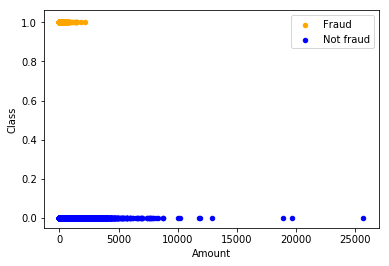

In [5]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Not fraud', ax=ax)
plt.show()

<h2>Fraudulent transactions by time and amount</h2>

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


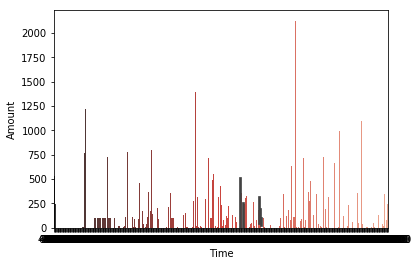

In [6]:
ax = sns.barplot("Time", y="Amount", data=fraud, palette="Reds_d")

<h2>Fraudulent transactions by time and amount with regression line</h2>

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


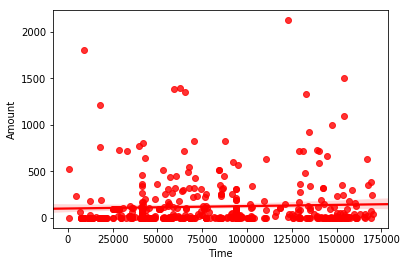

In [7]:
ax = sns.regplot("Time", y="Amount", data=fraud, color='Red')

<h2>All transactions by time and amount: Fraud vs. Non-fruad</h2>

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


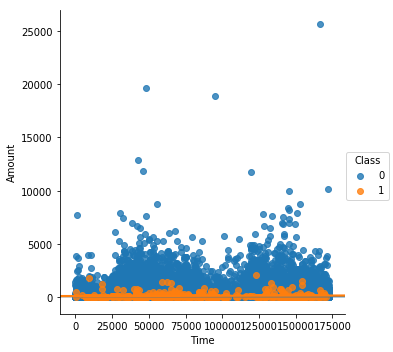

In [8]:
ax = sns.lmplot(x="Time", y="Amount", hue="Class", data=df);

<h2>Bar chart of transactions</h2>

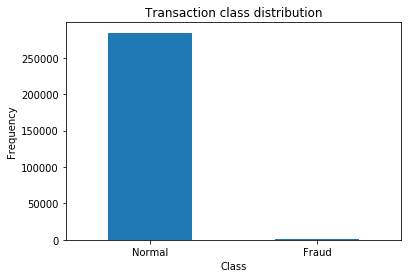

In [9]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

<h2>K-Means Clustering</h2>

In [10]:
X = df.iloc[:,:-1]
y = df['Class']

X_scaled = scale(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.33, random_state=500)

In [11]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

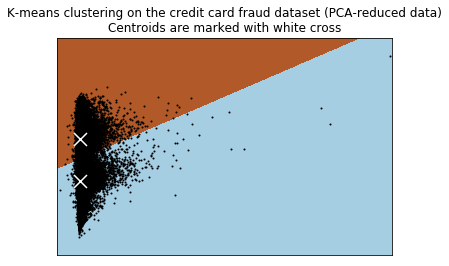

In [12]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_reduced[:, 0], X_reduced[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the credit card fraud dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [13]:
predictions = kmeans.predict(X_test)

pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))

pred_good = np.where(predictions == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(predictions))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Total test data points:", len(X_test))

Accuracy: 0.5501718322746763
False negative rate (with respect to misclassifications):  0.0022233785893372437
False negative rate (with respect to all the data):  0.0010001383170012874
False negatives, false positives, mispredictions: 94 42184 42278
Total test data points: 93987


<h2>Machine Learning - Logistic Regression</h2>

In [14]:
# Collect all columns except for the last one using iloc // Input data
x = df.iloc[:, :-1]

# Everything labeled Class is what were trying to predict
y = df['Class']

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

<h2>Build Logistic Regression Model</h2>

In [15]:
# C makes sure we are not overfitting (Inverse of lamda)
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print('Score: ', logistic.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.998876438309441


In [16]:
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)
print(classification_report(y_test, y_predicted))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99517
           1       0.73      0.52      0.61       166

    accuracy                           1.00     99683
   macro avg       0.86      0.76      0.80     99683
weighted avg       1.00      1.00      1.00     99683



<h2>Model 2</h2>

In [17]:
features = ['Amount'] + ['V%d' % number for number in range(1, 29)]

target = 'Class'

# creates to new data frames, one with all the predicting data, and the other with the target
x2 = df[features]
y2 = df[target]

<h3>Normalize the data</h3>

In [18]:
def normalize(X):
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

In [19]:
# Creates a model object for us to use
model = linear_model.LogisticRegression(C=1e5)

# Creates a splitter object for us to use
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

# Loop to split the data, uses the splitter object
for train_indices, test_indices in splitter.split(X, y):
    # Split the data
    X_train, y_train = X.loc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.loc[test_indices], y.iloc[test_indices]
    
    # Normalize
    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    # Fits the model and creates a prediction
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 0 0 ... 0 0 0]


In [20]:
# let's see how well the model worked
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.86      0.61      0.71       246

    accuracy                           1.00    142404
   macro avg       0.93      0.80      0.86    142404
weighted avg       1.00      1.00      1.00    142404



<h2>Amount Stolen</h2>

In [21]:
amountStolen = (fraud['Amount'])
total = 0
for a in amountStolen:
    total = a
totalAmountStolen = amountStolen.sum()
print("Amount stolen: ")
print(totalAmountStolen)

Amount stolen: 
60127.97000000001


<h2>Average Amount Stolen per Transaction</h2>

In [22]:
averageAmountStolen = (totalAmountStolen / len(fraud))
print("Average amount stolen: ")
print(averageAmountStolen)

Average amount stolen: 
122.2113211382114


<h1>Summary</h1><br>

<h2>Total transactions: 284,087<br><br>
    Fraudulent transactions: 492<br><br>
    Amount stolen: 60,127.97<br><br>
    Average amount stolen per fraud transaction: 122.22